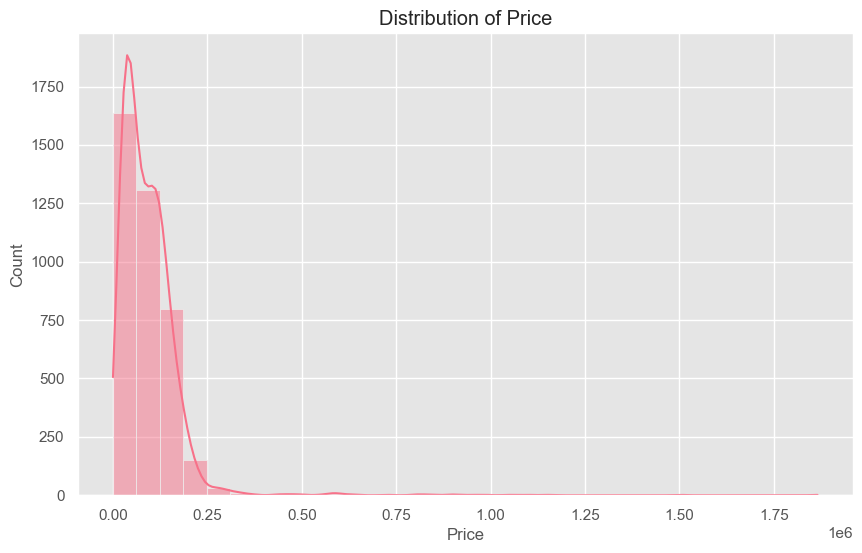

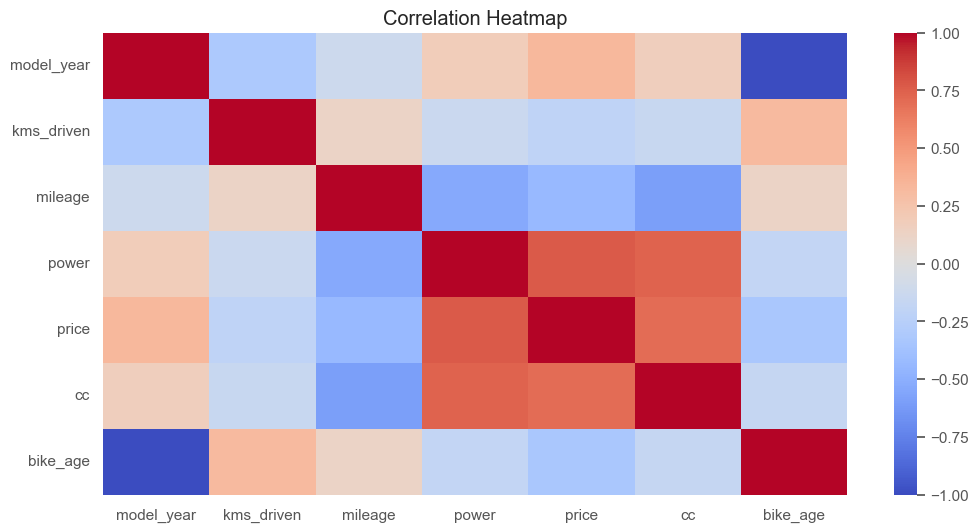

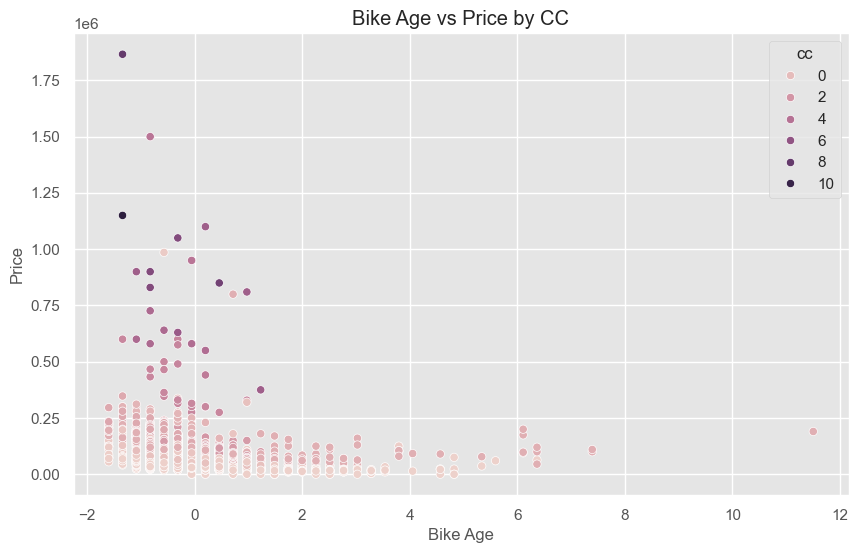

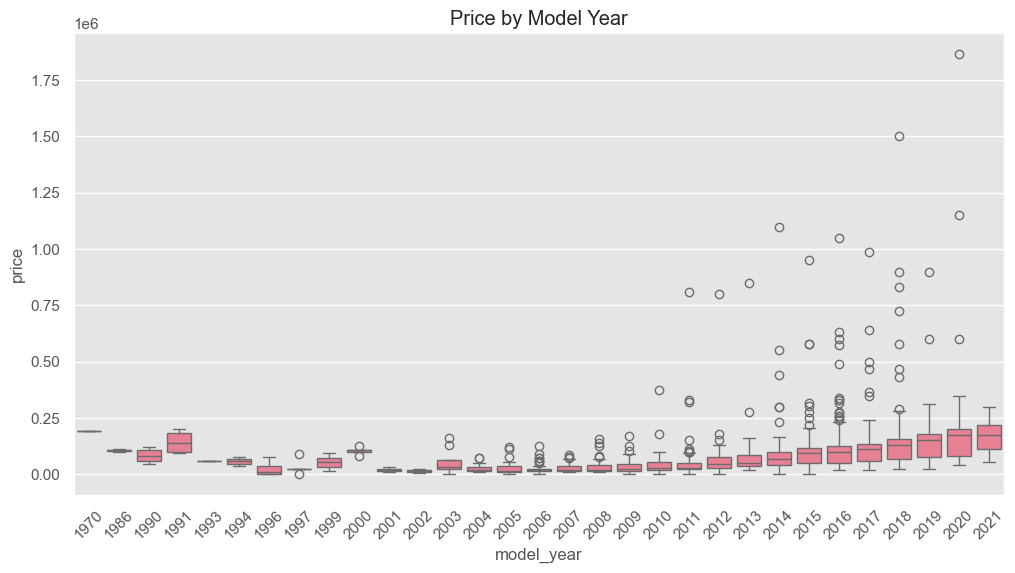

Linear Regression R2: -9.44771774544554e+20
Random Forest R2: 0.893355888226007


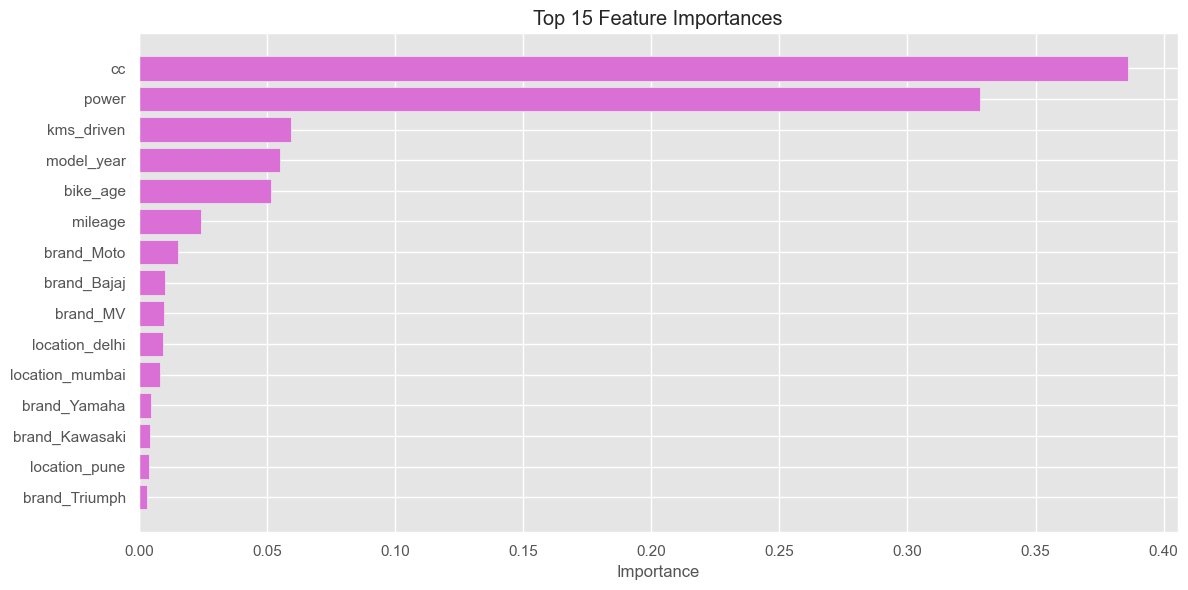

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use('ggplot')

sns.set_palette("husl")

df = pd.read_csv("bikes.csv")

df['kms_driven'] = df['kms_driven'].str.replace('Km', '', regex=False).str.replace(',', '', regex=False)
df['kms_driven'] = pd.to_numeric(df['kms_driven'], errors='coerce')
df['mileage'] = df['mileage'].str.replace(r'\s+', ' ', regex=True).str.strip()
df['power'] = df['power'].str.replace(r'\s+', ' ', regex=True).str.strip()
df['mileage'] = df['mileage'].str.extract(r'(\d+\.?\d*)').astype(float)
df['power'] = df['power'].str.extract(r'(\d+\.?\d*)').astype(float)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['cc'] = df['model_name'].str.extract(r'(\d+)(?=cc)').astype(float)
df['bike_age'] = 2025 - df['model_year']
df['brand'] = df['model_name'].str.split().str[0]
df.dropna(inplace=True)
df = pd.get_dummies(df, columns=['owner', 'location', 'brand'], drop_first=True)

scaler = StandardScaler()
cols = ['kms_driven', 'mileage', 'power', 'cc', 'bike_age']
df[cols] = scaler.fit_transform(df[cols])

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=False, cmap="coolwarm")

plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='bike_age', y='price', hue='cc', data=df)
plt.title("Bike Age vs Price by CC")
plt.xlabel("Bike Age")
plt.ylabel("Price")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='model_year', y='price', data=df)
plt.xticks(rotation=45)
plt.title("Price by Model Year")
plt.show()

X = df.drop(['price', 'model_name'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

importances = rf.feature_importances_
indices = np.argsort(importances)[-15:]

plt.figure(figsize=(12, 6))
plt.barh(range(len(indices)), importances[indices], color='orchid')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Importance")
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.show()
